### Importing Data

In [183]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
plt.rcParams['figure.figsize']=(12,7)

In [185]:
pd.set_option('display.max_columns', None)

weather = pd.read_csv('./assets/weather.csv')

### Data Overview

In [188]:
weather.shape

(2944, 22)

There are 2944 data points and 22 variables

In [191]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [193]:
# Check for null values for each feature

weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [195]:
# Check the data types and completeness of data

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

### Terminology of Table

|Feature|Description
|:--|:--- 
|Station |STATION WHERE OBSERVATIONS WERE TAKEN
|Date| DATE OF MEASUREMENT 
|Tmax| MAXIMUM TEMPERATURE (DEGREES F)  
|Tmin| MINIMUM TEMPERATURE (DEGREES F)
|Tavg| AVERAGE TEMPERATURE (DEGREES F)
|Depart| DEPARTURE FROM NORMAL (DEGREES F)
|DewPoint| AVERAGE DEW POINT (DEGREES F) 
|WetBulb| AVERAGE WET BULB (DEGREES F)
|Heat| HEATING (SEASON BEGINS WITH JULY)  
|Cool| COOLING (SEASON BEGINS WITH JANUARY) 
|Sunrise| SUNRISE (Calculated, not observed) 
|Sunset| SUNSET (Calculated, not observed)  
|CodeSum| WEATHER TYPE 
|Depth| SNOW/ICE (ON GROUND)(1200 UTC)  
|Water1| WATER EQUIVALENT (1800 UTC)
|SnowFall| SNOWFALL (INCHES AND TENTHS)(2400 LST) 
|PrecipTotal| PRECIPITATION INCHES (24-HR PERIOD ENDING AT INDICATED LOCAL STANDARD TIME) 
|StnPressure| AVERAGE STATION PRESSURE (INCHES OF HG) 
|SeaLevel| AVERAGE SEA LEVEL PRESSURE (INCHES OF HG) 
|ResultSpeed| RESULTANT WIND SPEED -  MILES PER HOUR 
|ResultDir| RESULTANT DIRECTION - (WHOLE DEGREES)  
|AvgSpeed| AVERAGE SPEED 
 
 T - Trace Data considered too small to be measured by standard units<br />
 M - Missing

### Inspection of Raw Data

|Feature|Data Type|Findings
|:--|:-- |:-- 
|Station|int64 |2 stations ( CHICAGO O'HARE INTERNATIONAL AIRPORT or CHICAGO MIDWAY INTL ARPT)
|Date|object| Months of May till October (From the years 2007 to 2014)
|Tmax|int64 | Integer value range. No differing formats
|Tmin|int64 | Integer value range. No differing formats
|Tavg|object |Integer & Object value range. Contains missing values denoted by M
|Depart|object |Integer & Object value range. Contains missing values denoted by M
|DewPoint|int64 |Integer value range. No differing formats|
|WetBulb|object |Integer & Object value range. Contains missing values denoted by M
|Heat|object  |Integer & Object value range. Null value denoted by 0. Contains missing values denoted by M
|Cool|object  |Integer & Object value range. Null value denoted by 0. Contains missing values denoted by M 
|Sunrise|object  |Integer & Object value range. Contains missing values denoted by "-"
|Sunset|object  |Integer & Object value range. Contains missing values denoted by "-"
|CodeSum|object  |Categorical Data of String Values with special characters denoting combinations. Contains blank cells
|Depth|object  |Integer & Object value range. 2 values 0 or M. Contains missing values denoted by M
|Water1|object | Object value range. Contains only one value M
|SnowFall|object | Float and object value range with only 4 categories (0,0.1,M,T)
|PrecipTotal|object |Float and object value range which a wide range of float values. Contains missing & trace values denoted by M,T
|StnPressure|object | Float and object value range. Contains missing values denoted by M 
|SeaLevel|object  | Float and object value range. Contains missing values denoted by M    
|ResultSpeed|float64 |Float value range. No differing formats     
|ResultDir|int64 | Integer value range. No differing formats     
|AvgSpeed|object | Float & Object value range. Contains missing values denoted by M 

### Proportion of missing values on affected variables

In [202]:
print("Tavg - {}".format((weather['Tavg'] == 'M').sum()))
print("Depart - {}".format((weather['Depart'] == 'M').sum()))
print("WetBulb - {}".format((weather['WetBulb'] == 'M').sum()))
print("Heat - {}".format((weather['Heat'] == 'M').sum()))
print("Cool - {}".format((weather['Cool'] == 'M').sum()))
print("Sunrise - {}".format((weather['Sunrise'] == '-').sum()))
print("Sunset - {}".format((weather['Sunset'] == '-').sum()))
print("CodeSum - {}".format((weather['CodeSum'] == ' ').sum()))
print("Depth - {}".format((weather['Depth'] == 'M').sum()))
print("Water1 - {}".format((weather['Water1'] == 'M').sum()))
print("SnowFall (M) - {}".format((weather['SnowFall'] == 'M').sum()))
print("SnowFall (T) - {}".format((weather['SnowFall'] == '  T').sum()))
print("PrecipTotal (M) - {}".format((weather['PrecipTotal'] == 'M').sum()))
print("PrecipTotal (T) - {}".format((weather['PrecipTotal'] == '  T').sum()))
print("StnPressure - {}".format((weather['StnPressure'] == 'M').sum()))
print("SeaLevel - {}".format((weather['SeaLevel'] == 'M').sum()))
print("AvgSpeed - {}".format((weather['AvgSpeed'] == 'M').sum()))

Tavg - 11
Depart - 1472
WetBulb - 4
Heat - 11
Cool - 11
Sunrise - 1472
Sunset - 1472
CodeSum - 1609
Depth - 1472
Water1 - 2944
SnowFall (M) - 1472
SnowFall (T) - 12
PrecipTotal (M) - 2
PrecipTotal (T) - 318
StnPressure - 4
SeaLevel - 9
AvgSpeed - 3


### Preliminary Findings on the Raw Data Set

<ul>
<li>Irregular data type columns have missing or small trace data categorized by M,T,-, Blank values</li>
<li>Dates can be more granularly segregated</li>
<li>The station type bears little to no relevance since the weather conditions are provided in detail in data set</li>
<li>Most of the numerical data should converted to float values after missing values are treated</li>
<li>Half of the 'Departure' values are missing due to it not being tracked by Station 2. Considering that the departure from normal measures more of a variation from average temperature, this data could be dropped as it may not have an impact on temperatures that already exist and are recorded.</li>
<li>More than half of the 'CodeSum' values are blank and the weather conditions come in several permutations. Dummification is possible but due to the large number of missing data, it might be prudent to drop this feature since there are other more preise temperature indicators</li>
<li>Half of 'Depth' has missing and the remaining values are also zero. Hence, the entire set would still be zero value after any imputation and hence would be dropped. The snow/ice depth also seems to be irrelevant since the whole category itself points to a very low temperature.</li>
<li>Half of 'Sunrise' & 'Sunset' values are missing due to them not being tracked by Station 2. The loss of data for the sets are too big to be imputed since it does not contain categorical data as well. Both variables will be dropped.</li>
<li>'Water1' has the same values of missing and should be dropped.</li>
<li>'Snowfall' depth also seems to be irrelevant since the whole category itself points to a very low temperature. This feature will be dropped</li>
<li>'Tavg', 'WetBulb', 'Heat', 'Cool','PrecipTotal','StnPressure','SeaLevel','AvgSpeed' are eligible categories that have 'M' values.</li>
<li>Trace amount is defined as less than 0.005 inch</li>
</ul>

|Feature|Action
|:--|:-- 
|Date|To further break up into Year, Month & Day
|Station|To drop since not relevant in train or test set
|Tavg|Replace missing denotation with Nan type
|Depart|To drop
|WetBulb|Replace missing denotation with Nan type
|Heat|Replace missing denotation with Nan type
|Cool|Replace missing denotation with Nan type
|Sunrise|To drop
|Sunset|To drop
|CodeSum|To drop
|Depth|To drop
|Water1|To drop
|SnowFall|To drop    
|PrecipTotal|Replace missing denotation with Nan type and trace values with 0.005    
|StnPressure|Replace missing denotation with Nan type 
|SeaLevel|Replace missing denotation with Nan type           
|AvgSpeed|Replace missing denotation with Nan type 

### Drop identified features

In [208]:
weather.drop(['Station','Depart','Sunrise','Sunset','CodeSum','Depth','Water1','SnowFall'],axis=1,inplace=True)

In [210]:
#Verify columns have been dropped
weather.head()

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,83,50,67,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2
1,2007-05-01,84,52,68,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6
2,2007-05-02,59,42,51,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4
3,2007-05-02,60,43,52,42,47,13,0,0.00,29.44,30.08,13.3,2,13.4
4,2007-05-03,66,46,56,40,48,9,0,0.00,29.39,30.12,11.7,7,11.9


### Treatment of M & T values

In [213]:
weather['Tavg'] = weather['Tavg'].apply(lambda x: np.nan if x == 'M' else x)
weather['WetBulb'] = weather['WetBulb'].apply(lambda x: np.nan if x == 'M' else x)
weather['Heat'] = weather['Heat'].apply(lambda x: np.nan if x == 'M' else x)
weather['Cool'] = weather['Cool'].apply(lambda x: np.nan if x == 'M' else x)
weather['PrecipTotal'] = weather['PrecipTotal'].apply(lambda x: np.nan if x == 'M' else x)
weather['PrecipTotal'] = weather['PrecipTotal'].apply(lambda x: '0.005' if x == '  T' else x)
weather['StnPressure'] = weather['StnPressure'].apply(lambda x: np.nan if x == 'M' else x)
weather['SeaLevel'] = weather['SeaLevel'].apply(lambda x: np.nan if x == 'M' else x)
weather['AvgSpeed'] = weather['AvgSpeed'].apply(lambda x: np.nan if x == 'M' else x)

### Correct Data Formats

In [216]:
format_columns = ['Tmax', 'Tmin', 'Tavg', 'DewPoint','WetBulb','Heat','Cool','PrecipTotal','StnPressure','SeaLevel','AvgSpeed']

for i in format_columns:
    weather[i] = weather[i].astype(float)

In [218]:
weather["Date"] = weather["Date"].astype("datetime64[ns]")

weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month
weather['Day'] = weather['Date'].dt.day

In [220]:
# Verify format change
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2944 non-null   datetime64[ns]
 1   Tmax         2944 non-null   float64       
 2   Tmin         2944 non-null   float64       
 3   Tavg         2933 non-null   float64       
 4   DewPoint     2944 non-null   float64       
 5   WetBulb      2940 non-null   float64       
 6   Heat         2933 non-null   float64       
 7   Cool         2933 non-null   float64       
 8   PrecipTotal  2942 non-null   float64       
 9   StnPressure  2940 non-null   float64       
 10  SeaLevel     2935 non-null   float64       
 11  ResultSpeed  2944 non-null   float64       
 12  ResultDir    2944 non-null   int64         
 13  AvgSpeed     2941 non-null   float64       
 14  Year         2944 non-null   int32         
 15  Month        2944 non-null   int32         
 16  Day   

### Unique values for each variable

In [223]:
for i in weather.columns:
    print("{0} - {1}".format(i,weather[i].nunique()))

Date - 1472
Tmax - 63
Tmin - 54
Tavg - 59
DewPoint - 54
WetBulb - 47
Heat - 30
Cool - 30
PrecipTotal - 167
StnPressure - 103
SeaLevel - 101
ResultSpeed - 190
ResultDir - 36
AvgSpeed - 177
Year - 8
Month - 6
Day - 31


### Examine Correlation between Weather Variables

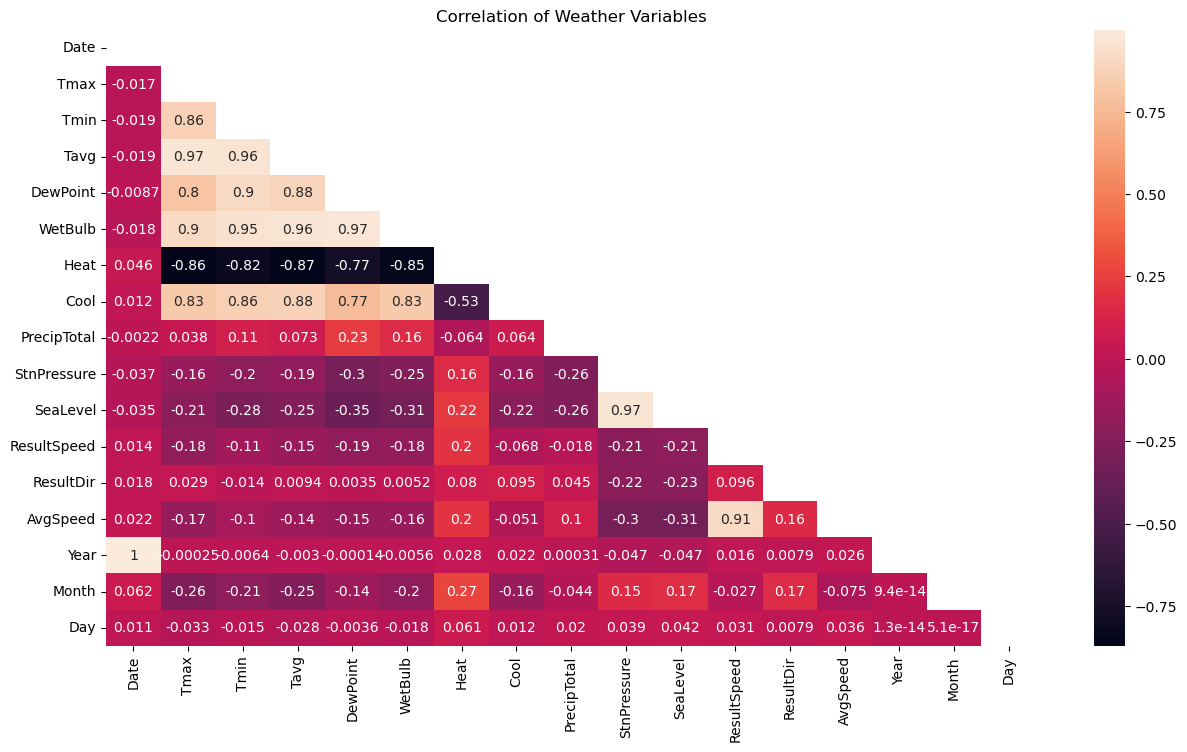

In [226]:
fix, ax = plt.subplots(figsize=(15,8))

# mask = np.zeros_like(weather.corr(), dtype=np.bool)
mask = np.zeros_like(weather.corr(), dtype=bool)

mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(weather.corr(), annot=True,mask=mask, ax=ax).set_title("Correlation of Weather Variables");

plt.show()

From the correlation heatmap, we can observe <b>inter-correlation of more than 0.5</b> between:
    <ul>
    <li><b>Tmax vs Tmin</b> - A seasonal temperature range will be higher or lower at certain periods, relation will be further examined</li>
        <li><b>Tavg vs Tmax/Tmin</b> - Average based off the actual values of high and low temperatures, hence it will be positive correlated</li>
        <li><b>Wetbulb vs Temperature Values</b> - Wetbulb are based on the existing temperatures with a humidity factor included, hence it will be positive correlated</li>
            <li><b>Wetbulb vs Dewpoint</b> - The dew point is the temperature to which air must be cooled to become saturated with water vapor and is inter-related to the wet bulb and dry bulb temperature. Hence it will be positive correlated</li>
        <li><b>Heat vs Temperature Values</b> - Strong negative correlation between Heat and Temperature</li>
        <li><b>Heat vs Cool</b> - Both are inversely correlation</li>
        <li><b>Cool vs Temperature Values</b> - Strong positive correlation between Heat and Temperature</li>
    </ul>
The significant correlations are mostly within different variants of temperature measurements which mostly are to be expected and this collinearity may not give much significant insight. Correlations like Tmax and Tmin will be further examined.

Text(0.5, 1.0, 'Maximum Temperature Distribution by Month')

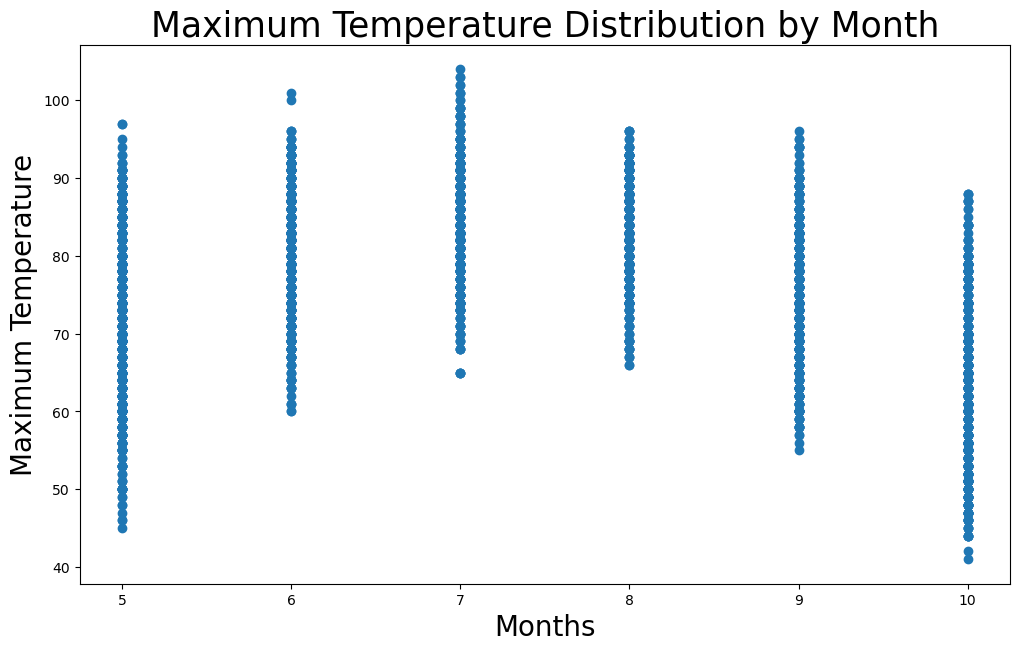

In [229]:
# plt.figure(figsize=(12,7))
plt.xlabel("Months", fontsize = 20)
plt.ylabel("Maximum Temperature", fontsize = 20)
plt.scatter(weather['Date'].dt.month, weather['Tmax'])
plt.title('Maximum Temperature Distribution by Month',fontsize = 25)

From the period of assessment from late-May to early-October, it is observed that the maximum tempeatures peak in July & Aug.

Text(0.5, 1.0, 'Heat vs Average Temperature')

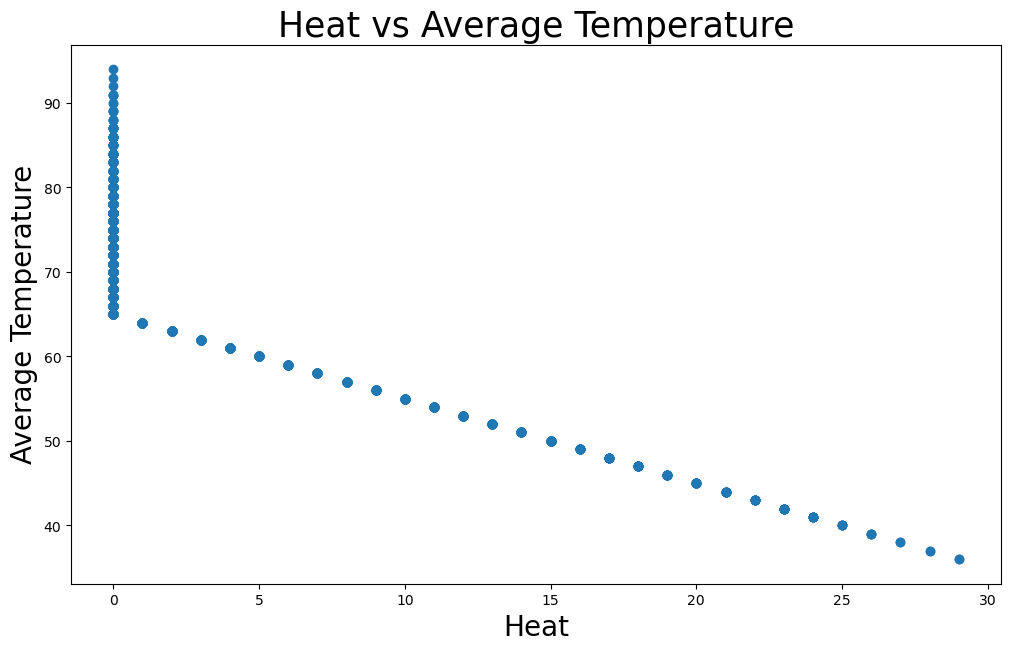

In [232]:
# plt.figure(figsize=(16,9))
plt.xlabel("Heat", fontsize = 20)
plt.ylabel("Average Temperature", fontsize = 20)
plt.scatter(weather['Heat'], weather['Tavg'])
plt.title('Heat vs Average Temperature',fontsize = 25)

Text(0.5, 1.0, 'Cool vs Average Temperature')

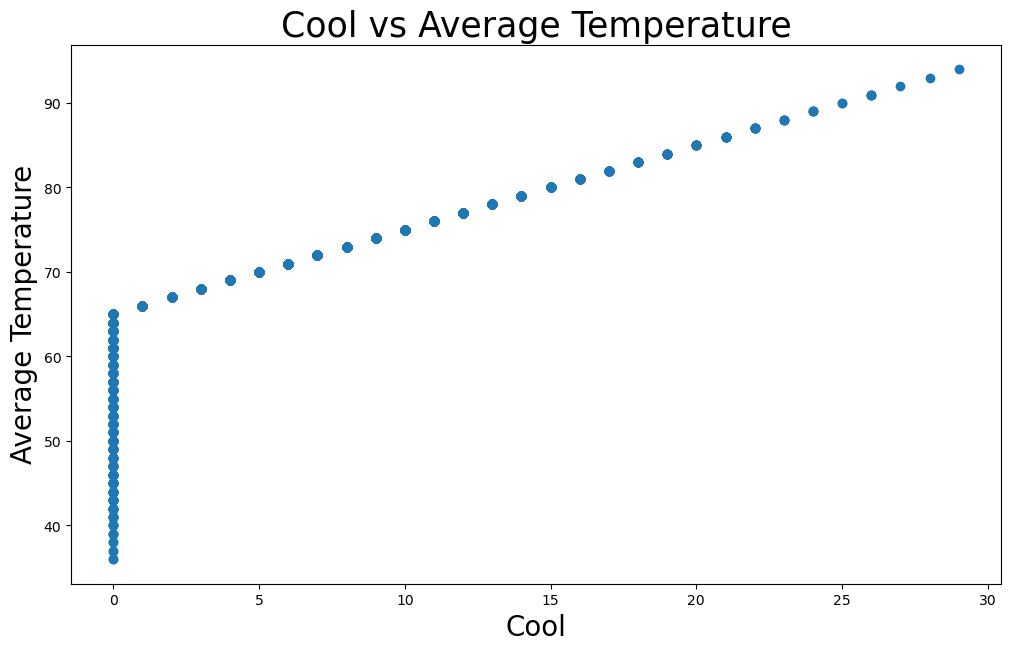

In [234]:
# plt.figure(figsize=(12,7))
plt.xlabel("Cool", fontsize = 20)
plt.ylabel("Average Temperature", fontsize = 20)
plt.scatter(weather['Cool'], weather['Tavg'])
plt.title('Cool vs Average Temperature',fontsize = 25)

There is a very perfect linear relationship between the Heat vs Average Temperature as well as the Cool vs Average Temperature. This strongly suggests that the heat and cool factor seem to be relative benchmark ratings against the absolute temperatures.

In [237]:
weather.to_csv('./assets/weather_clean.csv', index=False)